## 빈도 분석하기

In [8]:
import collections

sal_all = [9700, 9500, 9900, 3800, 4300, 4300, 3800, 4200, 4500, 3200, 5500, 3200, 3800, 4200, 9700]
sal_count = collections.Counter(sal_all)
print(sal_count)
sal_count[9900]

Counter({3800: 3, 9700: 2, 4300: 2, 4200: 2, 3200: 2, 9500: 1, 9900: 1, 4500: 1, 5500: 1})


1

### 최대, 최소 구하기

In [7]:
print('최대 연봉:',max(sal_all))
print('최소 연봉:',min(sal_all))
print('전체 건수:',len(sal_all))

최대 연봉: 9900
최소 연봉: 3200
전체 건수: 15


### 전체 값을 정렬하기

In [12]:
sal_sort = sorted(sal_all)
print(sal_sort)

print('첫번째 값:',sal_sort[0])
print('마지막 값:',sal_sort[-1])
print('-'*20)
# 역정렬하기
sal_sort_rev = sorted(sal_all, reverse=True)
print(sal_sort_rev)

[3200, 3200, 3800, 3800, 3800, 4200, 4200, 4300, 4300, 4500, 5500, 9500, 9700, 9700, 9900]
첫번째 값: 3200
마지막 값: 9900
--------------------
[9900, 9700, 9700, 9500, 5500, 4500, 4300, 4300, 4200, 4200, 3800, 3800, 3800, 3200, 3200]


### 평균값 계산하기

In [14]:
mean_sal = sum(sal_all) / len(sal_all)
print('평균값:',mean_sal)

# numpy 모듈 사용하기
import numpy as np
print('numpy 평균값',np.mean(sal_all))

평균값: 5573.333333333333
numpy 평균값 5573.333333333333


### 중앙값 계산하기
1. 데이터 정렬
2. 정렬 데이터 2로 나누기
    - 나머지 = 1(홀수) : 가운데 값
    - 나머지 = 0(짝수) : 가운데 두개의 평균값

#### 홀수인 경우

In [19]:
sal_sort = sorted(sal_all)
print('전체 갯수:',len(sal_all))

# //시 소수점은 생략
print('가운데 값의 자리번호:', len(sal_all)//2)
print('중앙값: ', sal_sort[len(sal_all)//2])

# numpy로 중앙값 찾기
print('numpy 중앙값:', np.median(sal_all))

전체 갯수: 15
가운데 값의 자리번호: 7
중앙값:  4300
numpy 중앙값: 4300.0


#### 짝수인 경우

In [28]:
sal_all_1 = [9700, 9500, 9900, 3800, 4300, 4300, 3800, 4200, 4500, 5500, 3200, 3800, 4200, 9700]
print('한명을 제외한 전체 갯수: ', len(sal_all_1))

mean_sal_1 = sum(sal_all_1)/len(sal_all_1)
print('한명을 제외한 평균: ', round(mean_sal_1,3))
print('-'*20)

print('가운데 값의 자리:', len(sal_all_1) // 2)
sal_sort_1 = sorted(sal_all_1)
left_value = (len(sal_all_1)//2)-1
right_value = len(sal_all_1) // 2

print('중앙값의 왼쪽값 위치 번호:',left_value )
print('중앙값의 오른쪽값 위치 번호:',right_value )

mid_value = (sal_sort_1[left_value] + sal_sort_1[right_value]) / 2
print('중앙값:',mid_value)
print('-'*20)

# numpy를 이용한 중앙값 찾기
print('numpy 중앙값:', np.median(sal_all_1))

한명을 제외한 전체 갯수:  14
한명을 제외한 평균:  5742.857
--------------------
가운데 값의 자리: 7
중앙값의 왼쪽값 위치 번호: 6
중앙값의 오른쪽값 위치 번호: 7
중앙값: 4300.0
--------------------
numpy 중앙값: 4300.0


### 분산과 표준편차
- 편차 : 평균과 원본 데이터를 비교한 차이값
- 분산 : 편차를 제곱하여 구한 값
- 표준편차 : 분산에 루트를 계산 -> 편차의 평균을 구한 값

In [29]:
print('분산값: ', round(np.var(sal_all),2))

# 평균값과 표준편차 값만큼 떨어져있다고 보면 됨
print('표준편차값: ', round(np.std(sal_all),2))

분산값:  6471288.89
표준편차값:  2543.87


### 상관관계 분석

In [37]:
# 피어슨 상관계수 
import pandas as pd

lst =[[1,2,3,4,5],
      [3,5,8,11,13]]

df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr)

          0         1
0  1.000000  0.997054
1  0.997054  1.000000


### 선형회귀 분석

slope: 0.94 / intercept -4.199999999999989 / 상관계수 0.8660744134561783 / P-Value 0.057637687745097074 / 에러의 표준편차 0.3132624033192196
예상IQ: 105.78


<ipython-input-39-424b3ff85525>:7: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  ry = polyval([slope, intercept], x)


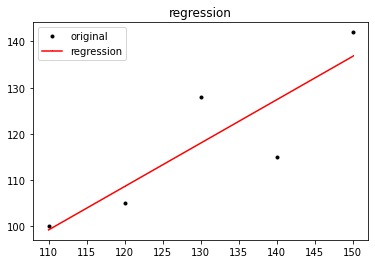

In [39]:
from scipy import stats, polyval
from pylab import plot, title, show, legend
x = [110, 120, 130, 140, 150]
y = [100, 105, 128, 115, 142]

slope, intercept, r, p, std = stats.linregress(x,y)
ry = polyval([slope, intercept], x)

print('slope:',slope,'/','intercept',intercept,'/','상관계수',r,'/','P-Value',p,'/','에러의 표준편차',std)
print('예상IQ:',117*slope + intercept)

# 시각화
plot(x,y,'k.')
plot(x,ry,'r,-')
title('regression')

legend(['original','regression'])
show()